In [3]:
!gpustat

dell-PowerEdge-T640         Tue Dec 26 11:21:11 2023  470.223.02
[0] NVIDIA GeForce RTX 3090 | 82'C,  87 % |  3094 / 24268 MB | maxiaojuan(257M) caozheng(2829M) gdm(4M)
[1] NVIDIA GeForce RTX 3090 | 88'C, 100 % | 13086 / 24268 MB | caozheng(9641M) caozheng(3437M) gdm(4M)
[2] NVIDIA GeForce RTX 3090 | 86'C, 100 % | 11510 / 24268 MB | caozheng(2427M) caozheng(9075M) gdm(4M)


In [4]:
import torch
import torch.nn as nn
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
!pwd

/data/shanjiawang/footprint/footnet


In [5]:
cur_path = os.path.dirname(os.getcwd())
cur_path

'/data/shanjiawang/footprint'

In [6]:
image_path = os.path.join(cur_path,"dataset/concate_testdata_inverse.npy")
image_path

'/data/shanjiawang/footprint/dataset/concate_testdata_inverse.npy'

In [7]:
# 测试集的形状 (2001,4)
image_npy = np.load(image_path,allow_pickle=True)
image_npy.shape

(2001, 4)

In [12]:
img, lable = image_npy[0][3], image_npy[0][2]
if np.all(img[:, :, 0] == img[:, :, 1]) and np.all(img[:, :, 1] == img[:, :, 2]):
    print("这是灰度图")
else:
    print("这不是灰度图")

print(len(img),len(img[0]))

这不是灰度图
448 448


In [15]:
def is_gray(idx:int) -> bool:
    img, _ = image_npy[idx][3], image_npy[idx][2]
    if np.all(img[:, :, 0] == img[:, :, 1]) and np.all(img[:, :, 1] == img[:, :, 2]):
        return True
    else:
        return False

In [ ]:
cnt = 0
index_list = []
for idx in range(len(image_npy)):
    if not is_gray(idx):
        cnt += 1
        index_list.append(idx)
cnt,index_list

In [12]:
from Mydataset import Mydataset
from torchvision import transforms
from torch.utils.data import DataLoader

transform = transforms.ToTensor()
test_data = Mydataset(image_path,transform=transform)
test_loader = DataLoader(test_data,batch_size=1)
type(test_loader)

torch.utils.data.dataloader.DataLoader

In [13]:
image,label = test_data[0]
image.shape, label

(torch.Size([3, 448, 448]), tensor([30.]))

In [14]:
# image.shape and label shape is torch.Size([1, 3, 448, 448]) torch.Size([1, 1])

for batch_idx, data in enumerate(test_loader):
    image, label = data
    print(image.shape, label)
    break

torch.Size([1, 3, 448, 448]) tensor([[30.]])


In [15]:
# 通过iter的方式索引
data_iter = iter(test_loader)
data = data_iter.next()
image, label = data
print(image.shape, label)

torch.Size([1, 3, 448, 448]) tensor([[30.]])


In [16]:
def show(image):
    if len(image.shape) == 2:
        plt.imshow(image, cmap="gray")  # color map = gray
    else:
        plt.imshow(image[..., ::-1])

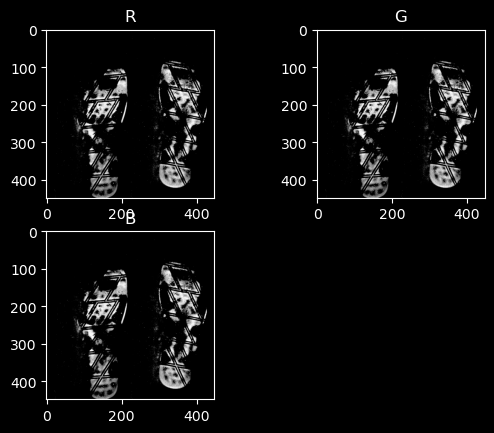

In [19]:
image = image.squeeze()
format = "RGB"
for i in range(3):
    plt.subplot(2,2,i+1)
    plt.imshow(image[i,:],cmap="gray")
    plt.title(format[i])
# show(image)

In [21]:
from torch.utils.data.sampler import SubsetRandomSampler
import random

data_path = os.path.join(cur_path,"dataset/concate_testdata_inverse.npy")
data_npy = np.load(data_path,allow_pickle=True)

# split valdation Proportion
val_split = 0.2

# shuffle or not
shuffle_dataset = True

# set random seed
random_seed = 1234

# create data indices for trainning and testing splits
dataset_size = len(data_npy)
indices = list(range(dataset_size))

# count out split size
split = int(np.floor(val_split * dataset_size))
split

400

In [23]:

if shuffle_dataset:
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:],indices[:split]
len(train_indices), len(val_indices)

(1601, 400)

In [24]:
train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)
train_sampler, val_sampler

(<torch.utils.data.sampler.SubsetRandomSampler at 0x7fd9f9184cd0>,
 <torch.utils.data.sampler.SubsetRandomSampler at 0x7fd9f91845b0>)

In [30]:
dataset = Mydataset(data_path,transform=transform)
train_loader = DataLoader(dataset,batch_size=1,sampler=train_sampler)

dataiter = iter(train_loader)
data = dataiter.next()
features, labels = data
features, labels = features.squeeze(), labels.item()
features.shape, labels

(torch.Size([3, 448, 448]), 28.0)

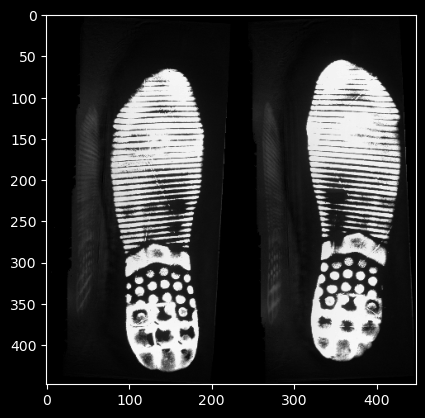

In [33]:
plt.imshow(features[0,:,:],cmap='gray')